#Assignment 4 - Data Science

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
data = pd.read_csv('cerials.csv')

# EDA on Cerials data

In [41]:
data

,Cereal,Calories,Sugar
0,Kellogg's All Bran,80.0,6.0
1,Kellogg's Corn Flakes,100.0,2.0
2,Wheaties,100.0,4.0
3,Nature's Path Organic,110.0,4.0
4,Multigrain Flakes,NaN,NaN
5,Kellogg's Rice Krispies,130.0,4.0
6,Post Shredded Wheat Vanilla,190.0,11.0
7,Almond,NaN,NaN
8,Kellogg's Mini Wheats,200.0,10.0


In [42]:
df = pd.DataFrame(data)
df

,Cereal,Calories,Sugar
0,Kellogg's All Bran,80.0,6.0
1,Kellogg's Corn Flakes,100.0,2.0
2,Wheaties,100.0,4.0
3,Nature's Path Organic,110.0,4.0
4,Multigrain Flakes,NaN,NaN
5,Kellogg's Rice Krispies,130.0,4.0
6,Post Shredded Wheat Vanilla,190.0,11.0
7,Almond,NaN,NaN
8,Kellogg's Mini Wheats,200.0,10.0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Cereal    9 non-null      object 
 1   Calories  7 non-null      float64
 2   Sugar     7 non-null      float64
dtypes: float64(2), object(1)
memory usage: 344.0+ bytes


In [44]:
df.describe()

,Calories,Sugar
count,7.000000,7.000000
mean,130.000000,5.857143
std,46.904158,3.387653
min,80.000000,2.000000
25%,100.000000,4.000000
50%,110.000000,4.000000
75%,160.000000,8.000000
max,200.000000,11.000000


In [45]:
#Find out the missing data
df.isnull().sum()

,0
Cereal,0
Calories,2
Sugar,2


In [46]:
#Lets impute and fil the missing values
df["Calories"].fillna(df["Calories"].mean(), inplace = True)
df["Sugar"].fillna(df["Sugar"].mean(),inplace= True)

<ipython-input-46-3529f3130399>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Calories"].fillna(df["Calories"].mean(), inplace = True)
<ipython-input-46-3529f3130399>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [47]:
#Check out again for missing data
df.isnull().sum()


,0
Cereal,0
Calories,0
Sugar,0


In [48]:
df

,Cereal,Calories,Sugar
0,Kellogg's All Bran,80.0,6.000000
1,Kellogg's Corn Flakes,100.0,2.000000
2,Wheaties,100.0,4.000000
3,Nature's Path Organic,110.0,4.000000
4,Multigrain Flakes,130.0,5.857143
5,Kellogg's Rice Krispies,130.0,4.000000
6,Post Shredded Wheat Vanilla,190.0,11.000000
7,Almond,130.0,5.857143
8,Kellogg's Mini Wheats,200.0,10.000000


# Compute the covariance between calories and sugar content using the appropriate statistical method

In [49]:
cov = np.cov(df["Calories"],df["Sugar"])
cov = pd.DataFrame(cov, columns=['Sugar', 'Calories'], index=['Calories', 'Sugar'])
print(cov)

           Sugar    Calories
Calories  1650.0  100.000000
Sugar      100.0    8.607143


In [50]:
# Compute the covariance between calories and sugar content
cov_matrix = df[['Calories', 'Sugar']].cov()
cov_calories_sugar = cov_matrix.loc['Calories', 'Sugar']
cov_calories_sugar

100.0

In [51]:
#Method 2 using Formula


#Compute the correlation coefficient between calories and sugar content using the Pearson correlation formula.

In [52]:
# Compute the Pearson correlation coefficient between calories and sugar content
corr_calories_sugar = df[['Calories', 'Sugar']].corr().loc['Calories', 'Sugar']
corr_calories_sugar


0.8391285978453279

In [ ]:
# Displaying conclusions based on computed values
print("Covariance between Calories and Sugar: ", cov_calories_sugar)
print("Correlation Coefficient between Calories and Sugar: ",corr_calories_sugar)


In [54]:
# Displaying conclusions based on computed values
print(f"Covariance between Calories and Sugar: {cov_calories_sugar}")
print(f"Correlation Coefficient between Calories and Sugar: {corr_calories_sugar}")



Covariance between Calories and Sugar: 100.0
Correlation Coefficient between Calories and Sugar: 0.8391285978453279


In [55]:
# Drawing conclusions about the relationship between calories and sugar
if cov_calories_sugar > 0:
    print("There is a positive covariance between Calories and Sugar. This suggests that as the calorie content increases, sugar content tends to increase as well.")
else:
    print("There is a negative covariance between Calories and Sugar. This suggests that as the calorie content increases, sugar content tends to decrease.")

if corr_calories_sugar > 0.7:
    print("The correlation coefficient is strong and positive, indicating a strong linear relationship between calories and sugar.")
elif corr_calories_sugar > 0:
    print("The correlation coefficient is positive, indicating a moderate linear relationship between calories and sugar.")
else:
    print("The correlation coefficient is weak or negative, indicating a weak or inverse relationship between calories and sugar.")

There is a positive covariance between Calories and Sugar. This suggests that as the calorie content increases, sugar content tends to increase as well.
The correlation coefficient is strong and positive, indicating a strong linear relationship between calories and sugar.


# Qns 2
You are provided with data regarding the fill amount in 2-liter soft drink bottles,
which follows a normal distribution with:
Mean = 2.0 liters
Standard deviation = 0.05 liters.

In [56]:
# Parameters for the normal distribution
mean = 2.0  # Mean of the distribution (in liters)
std_dev = 0.05  # Standard deviation of the distribution (in liters)

# Number of simulated data points (e.g., 1000 bottles)
n = 1000

# Simulate the fill amounts for 1000 bottles
fill_amounts = np.random.normal(mean, std_dev, n)


In [57]:
# Display basic statistics
print(f"Mean of the simulated fill amounts: {np.mean(fill_amounts):.3f} liters")
print(f"Standard Deviation of the simulated fill amounts: {np.std(fill_amounts):.3f} liters")



Mean of the simulated fill amounts: 2.000 liters
Standard Deviation of the simulated fill amounts: 0.049 liters


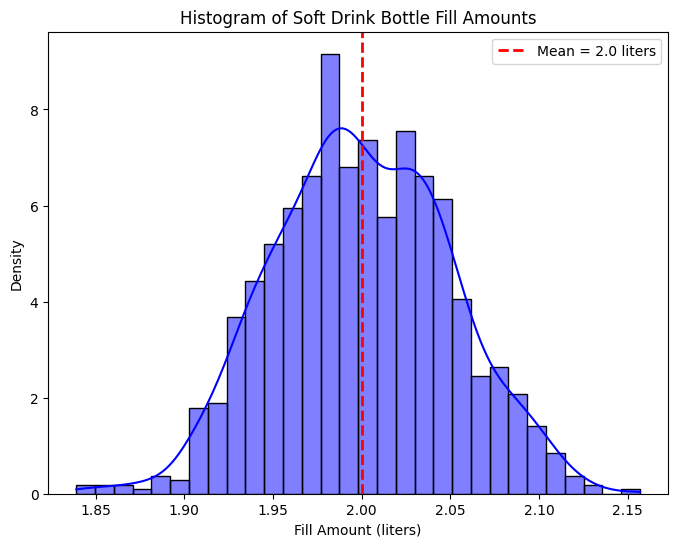

In [58]:
# Plot the histogram of the fill amounts
plt.figure(figsize=(8, 6))
sns.histplot(fill_amounts, bins=30, kde=True, color='blue', stat='density')
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean = {mean} liters')
plt.title('Histogram of Soft Drink Bottle Fill Amounts')
plt.xlabel('Fill Amount (liters)')
plt.ylabel('Density')
plt.legend()
plt.show()



In [59]:
# Perform a normality test (Shapiro-Wilk Test)
stat, p_value = stats.shapiro(fill_amounts)

print(f"\nShapiro-Wilk Test Statistic: {stat:.3f}")
print(f"Shapiro-Wilk Test p-value: {p_value:.3f}")

if p_value > 0.05:
    print("The fill amounts follow a normal distribution (Fail to Reject H0).")
else:
    print("The fill amounts do not follow a normal distribution (Reject H0).")




Shapiro-Wilk Test Statistic: 0.998
Shapiro-Wilk Test p-value: 0.233
The fill amounts follow a normal distribution (Fail to Reject H0).


In [60]:
# Summary of the data
print(f"\nSummary of Fill Amounts:")
print(f"Min: {np.min(fill_amounts):.3f} liters")
print(f"Max: {np.max(fill_amounts):.3f} liters")
print(f"Mean: {np.mean(fill_amounts):.3f} liters")
print(f"Standard Deviation: {np.std(fill_amounts):.3f} liters")



Summary of Fill Amounts:
Min: 1.839 liters
Max: 2.157 liters
Mean: 2.000 liters
Standard Deviation: 0.049 liters


In [68]:

# Create a Pandas DataFrame
df = pd.DataFrame({'Fill_Amount': fill_amounts})

# Calculate the proportion of bottles within a certain range
proportion_between = df[(df['Fill_Amount'] >= 1.90) & (df['Fill_Amount'] <= 2.10)].shape[0] / n

# Calculate the proportion of bottles less than a certain value
proportion_less_than = df[df['Fill_Amount'] < 1.90].shape[0] / n

print(f"Proportion of bottles between 1.90 and 2.10 liters: {proportion_between:.4f}")
print(f"Proportion of bottles with less than 1.90 liters: {proportion_less_than:.4f}")

Proportion of bottles between 1.90 and 2.10 liters: 0.9580
Proportion of bottles with less than 1.90 liters: 0.0270


#Assignment Submmited by UI22CS03